In [1]:
import pytz
import os
import sqlite3
import re
import uproot
import IPython
import sys
import numpy as np
import pandas as pd
import pymap3d as pm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pandasql import sqldf
from rnog_data.runtable import RunTable
from datetime import datetime, timedelta
from scipy.fft import fft
from scipy.signal import stft
from NuRadioReco.modules.io.RNO_G.readRNOGDataMattak import readRNOGData
from NuRadioReco.utilities import units
from Flight import Flight
from IPython.display import clear_output

## FlightTracker init

In [2]:
#-------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------
from FlightTracker import FlightTracker

start_time='2023-01-01 00:00:00'
stop_time='2024-01-01 00:00:00'
tracker = FlightTracker(start_time, stop_time, destination='./flights/flights_2023.db', already_calculated = True)
flights = tracker.flights
flights_distinct = tracker.flights_distinct
flights_distinct

,index,flightnumber,date,filename,mintime,maxtime,min_r,min_z,theta
0,4128,CLX17K,2023-01-01,2023.01.01-040336.db,2023-01-01 01:07:57.300000,2023-01-01 01:11:38.400000,112.5,8.6,87.0
1,4129,AFR271,2023-01-01,2023.01.01-040336.db,2023-01-01 01:14:44.300000,2023-01-01 01:22:31.500000,12.0,10.2,79.0
2,4130,N/A,2023-01-01,2023.01.01-040336.db,2023-01-01 01:18:45.400000,2023-01-01 01:18:45.400000,146.6,8.1,0.0
3,4131,N/A,2023-01-01,2023.01.01-040336.db,2023-01-01 08:34:32.500000,2023-01-01 17:34:45.100000,109.1,8.7,54.0
4,4132,BOX488,2023-01-01,2023.01.01-040336.db,2023-01-01 01:18:50.500000,2023-01-01 01:24:37.100000,72.6,8.1,82.0
...,...,...,...,...,...,...,...,...,...
6890,754,THY9WC,2023-12-31,2023.12.31-171747.db,2023-12-31 09:01:14.600000,2023-12-31 09:04:35.600000,118.0,9.5,88.0
6891,755,SAS936,2023-12-31,2023.12.31-171747.db,2023-12-31 10:37:47.800000,2023-12-31 10:43:44.500000,26.6,10.7,86.0
6892,756,ACA78,2023-12-31,2023.12.31-171747.db,2023-12-31 10:50:01.400000,2023-12-31 10:52:27.100000,138.3,8.9,89.0
6893,757,AFR291,2023-12-31,2023.12.31-171747.db,2023-12-31 15:59:06.500000,2023-12-31 16:07:23.900000,14.1,9.9,75.0


In [ ]:
flights

,index,id,latitude,longitude,altitude,seen,rssi,flightnumber,hexcode,track,speed,vertrate,readtime,date,filename,x,y,z,r2,readtime_utc
0,3293515,None,73.775381,-37.498352,34000.0,0.3,-22.9,CLX17K,4d0118,290.0,507.0,0.0,2023-01-01 01:07:57.300000,2023-01-01,2023.01.01-040336.db,105.868274,105.109614,8.619667,22330.420852,2023-01-01 01:07:57.300000+00:00
1,3293518,None,73.778966,-37.535339,34000.0,0.2,-24.4,CLX17K,4d0118,290.0,507.0,64.0,2023-01-01 01:08:02.300000,2023-01-01,2023.01.01-040336.db,106.133335,100.994595,8.681865,21539.567889,2023-01-01 01:08:02.300000+00:00
2,3293521,None,73.782852,-37.575645,34000.0,0.0,-23.1,CLX17K,4d0118,290.0,507.0,0.0,2023-01-01 01:08:07.300000,2023-01-01,2023.01.01-040336.db,106.419943,96.510256,8.746641,20715.937616,2023-01-01 01:08:07.300000+00:00
3,3293524,None,73.786972,-37.618389,34000.0,0.2,-23.9,CLX17K,4d0118,290.0,507.0,0.0,2023-01-01 01:08:12.400000,2023-01-01,2023.01.01-040336.db,106.723331,91.754577,8.811881,19886.421049,2023-01-01 01:08:12.400000+00:00
4,3293527,None,73.790817,-37.657871,34000.0,0.2,-24.6,CLX17K,4d0118,290.0,507.0,0.0,2023-01-01 01:08:17.400000,2023-01-01,2023.01.01-040336.db,107.006625,87.361695,8.868925,19161.141372,2023-01-01 01:08:17.400000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410601,572141,None,71.929864,-39.554820,37000.0,0.0,-23.7,VIR105,4073ce,298.0,478.0,-64.0,2023-12-31 16:19:02.300000,2023-12-31,2023.12.31-171747.db,-55.973929,-123.059508,9.844260,18373.632596,2023-12-31 16:19:02.300000+00:00
410602,572143,None,71.934939,-39.586487,36975.0,0.0,-21.4,VIR105,4073ce,298.0,479.0,-64.0,2023-12-31 16:19:07.400000,2023-12-31,2023.12.31-171747.db,-55.511686,-126.577629,9.771736,19198.930244,2023-12-31 16:19:07.400000+00:00
410603,572145,None,71.939966,-39.618153,36975.0,0.0,-20.5,VIR105,4073ce,298.0,479.0,-64.0,2023-12-31 16:19:12.400000,2023-12-31,2023.12.31-171747.db,-55.054019,-130.095822,9.704816,20050.051446,2023-12-31 16:19:12.400000+00:00
410604,572147,None,71.944885,-39.649200,37000.0,0.0,-22.2,VIR105,4073ce,298.0,479.0,-64.0,2023-12-31 16:19:17.400000,2023-12-31,2023.12.31-171747.db,-54.606566,-133.545414,9.644893,20909.278605,2023-12-31 16:19:17.400000+00:00


In [4]:
header_df = pd.DataFrame(columns = ['trigger_time', 'station_number', 'radiant_triggers'])
path = 'header'
i = 0

for filename in os.listdir('./header/'):
    print(filename, i)
    try:
        file = uproot.open(f"{path}/" + filename)
        temp_df = pd.DataFrame()
        
        '''
        # make mask to slice all data
        times = pd.to_datetime(np.array(file[path]['header/trigger_time']), unit = 's')
        mask = (times >= pd.to_datetime(start_time).tz_convert(None)) & (times <= pd.to_datetime(stop_time).tz_convert(None))

        # header information
        temp_df['station_number'] = np.array(file[path]['header/station_number'])[mask]
        temp_df['run_number'] = np.array(file[path]['header/run_number'])[mask]
        temp_df['event_number'] = np.array(file[path]['header/event_number'])[mask]
        temp_df['trigger_time'] = np.array(file[path]['header/trigger_time'])[mask]
        temp_df['radiant_triggers'] = np.array(file[path]['header/trigger_info/trigger_info.radiant_trigger'])[mask]
        temp_df['lt_triggers'] = np.array(file[path]['header/trigger_info/trigger_info.lt_trigger'])[mask]
        run_nr = np.array(file[path]['header/run_number'])[0]
        # combinded (waveform) information
        '''

    #            header information
        temp_df['station_number'] = np.array(file[path]['header/station_number'])
        temp_df['run_number'] = np.array(file[path]['header/run_number'])
        temp_df['event_number'] = np.array(file[path]['header/event_number'])
        temp_df['trigger_time'] = np.array(file[path]['header/trigger_time'])
        temp_df['radiant_triggers'] = np.array(file[path]['header/trigger_info/trigger_info.radiant_trigger'])
        temp_df['lt_triggers'] = np.array(file[path]['header/trigger_info/trigger_info.lt_trigger'])
        temp_df['force_triggers'] = np.array(file[path]['header/trigger_info/trigger_info.force_trigger'])
        temp_df['ext_triggers'] = np.array(file[path]['header/trigger_info/trigger_info.ext_trigger'])
        run_nr = np.array(file[path]['header/run_number'])[0]


        # save header information
        if len(header_df) == 0:
            header_df = temp_df
        else:
            header_df = pd.concat([header_df, temp_df], ignore_index=True, sort=False)
        i += 1
    except:
        print(f"can't open {filename}")

# since we are processing whole file again in order to save the scores, we need to filter for desired time interval
#header_df = header_df[(header_df.trigger_time >= start_time.timestamp()) & (stop_time.timestamp() >= header_df.trigger_time)]
#header_df['i'] = range(0, len(header_df))

#header_df = header_df[['i', 'station_number', 'run_number', 'event_number', 'trigger_time', 'radiant_triggers', 'lt_triggers', 'force_triggers']] # change order to have index in front



station24_run1861_headers.root 0
station13_run2171_headers.root 1
station21_run3497_headers.root 2
station11_run2030_headers.root 3
station12_run1791_headers.root 4
station21_run2482_headers.root 5
station22_run1621_headers.root 6
station21_run2481_headers.root 7
station11_run2951_headers.root 8
station13_run2168_headers.root 9
station11_run2880_headers.root 10
station11_run2004_headers.root 11
station24_run461_headers.root 12
station24_run1885_headers.root 13
station24_run1838_headers.root 14
station13_run2146_headers.root 15
station13_run2135_headers.root 16
station22_run1631_headers.root 17
station24_run2737_headers.root 18
station24_run1919_headers.root 19
station13_run1109_headers.root 20
station11_run2866_headers.root 21
station11_run3675_headers.root 22
station13_run2946_headers.root 23
station11_run2867_headers.root 24
station13_run2113_headers.root 25
station11_run2890_headers.root 26
station23_run1220_headers.root 27
station13_run2947_headers.root 28
station24_run1008_headers

In [4]:

t = tracker.flights_distinct.reset_index(drop=True)
temp_df = pd.DataFrame()


for i in range(len(t)):
    print(f'---------------------')
    print(f'start: {i + 1}/{len(t)}, {t.flightnumber.iloc[i]}')
    f = tracker.get_flight_by_index(i)
    flight = f.header_df.reset_index(drop=True)
    flight['fk_station_run_event'] = flight.station_number.astype(str) + '_' + flight.run_number.astype(str) + '_' + flight.event_number.astype(str)
    #print(flight.head(50))

    if len(flight) > 0:
        temp_df = pd.concat([temp_df, flight], ignore_index=True, sort=False)
    
    print(f'end: {i + 1}/{len(t)}')
    clear_output(wait=True)

print(len(temp_df))
temp_df.drop_duplicates(subset=['fk_station_run_event'], inplace=True)
print(len(temp_df))
#temp_df.head(50)

query = '''
    Select 
        flightnumber, 
        mintime, 
        maxtime, 
        --strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) as test_time, 
        count(*) as SumEvents, 
        round(count(*) / (JULIANDAY(t.maxtime) - JULIANDAY(t.mintime)) / 86400 * 10, 1) as EventsPer10Seconds,
        sum(cw), 
        sum(impulsive), 
        sum(lt_triggers), 
        sum(radiant_triggers), 
        sum(force_triggers) 
    From t
    Left Join temp_df
    On strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) >= t.mintime
    And strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) <= t.maxtime
    Group By flightnumber, maxtime, mintime
    order by mintime asc
    '''
result = sqldf(query)
clear_output(wait=True)
result


INFO:runtable_database:database connection to RNOG_live established


---------------------
start: 1/667, UAL955  


INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
/home/oliver/anaconda3/envs/work/lib/python3.11/site-packages/mattak/Dataset.py:212: UserWarning: data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.
  warnings.warn("data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.")
ERROR:root:Could not find a directory for the calibration files.Was RNO_G_DATA or RNO_G_ROOT_DATA defined as a system env variable?
INFO:NuRadioReco.readRNOGData:690 events in 1 runs/datasets have been found using the uproot Mattak backend.


Using uproot backend
Found combined file


INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
/home/oliver/anaconda3/envs/work/lib/python3.11/site-packages/mattak/Dataset.py:212: UserWarning: data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.
  warnings.warn("data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.")
ERROR:root:Could not find a directory for the calibration files.Was RNO_G_DATA or RNO_G_ROOT_DATA defined as a system env variable?
INFO:NuRadioReco.readRNOGData:388 events in 1 runs/datasets have been found using the uproot Mattak backend.


Using uproot backend
Found combined file


In [26]:
query = '''
    Select 
        flightnumber, 
        mintime, 
        maxtime, 
        --strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) as test_time, 
        count(*) as SumEvents, 
        round(count(*) / (JULIANDAY(t.maxtime) - JULIANDAY(t.mintime)) / 86400 * 10, 1) as EventsPer10Seconds,
        sum(cw), 
        sum(impulsive), 
        sum(lt_triggers), 
        sum(radiant_triggers), 
        sum(force_triggers) 
    From flights_distinct
    Left Join header_df
    On strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) >= t.mintime
    And strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) <= t.maxtime
    Group By flightnumber, maxtime, mintime
    order by mintime asc
    '''

result = sqldf(query)

PandaSQLException: (sqlite3.OperationalError) no such column: t.mintime
[SQL: 
    Select 
        flightnumber, 
        mintime, 
        maxtime, 
        --strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) as test_time, 
        count(*) as SumEvents, 
        round(count(*) / (JULIANDAY(t.maxtime) - JULIANDAY(t.mintime)) / 86400 * 10, 1) as EventsPer10Seconds,
        sum(cw), 
        sum(impulsive), 
        sum(lt_triggers), 
        sum(radiant_triggers), 
        sum(force_triggers) 
    From flights_distinct
    Left Join header_df
    On strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) >= t.mintime
    And strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) <= t.maxtime
    Group By flightnumber, maxtime, mintime
    order by mintime asc
    ]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [3]:
query = '''
SELECT 
    *
FROM flights_distinct
LEFT JOIN header_df
ON strftime('%Y-%m-%d %H:%M:%S.%f', datetime(header_df.trigger_time, 'unixepoch')) >= flights_distinct.mintime
AND strftime('%Y-%m-%d %H:%M:%S.%f', datetime(header_df.trigger_time, 'unixepoch')) <= flights_distinct.maxtime


'''
result = sqldf(query)

PandaSQLException: (sqlite3.OperationalError) no such table: header_df
[SQL: 
SELECT 
    *
FROM flights_distinct
LEFT JOIN header_df
ON strftime('%Y-%m-%d %H:%M:%S.%f', datetime(header_df.trigger_time, 'unixepoch')) >= flights_distinct.mintime
AND strftime('%Y-%m-%d %H:%M:%S.%f', datetime(header_df.trigger_time, 'unixepoch')) <= flights_distinct.maxtime


]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [23]:
result[result.trigger_time.notna()]

,index,flightnumber,date,filename,mintime,maxtime,min_r,min_z,theta,station_number,run_number,event_number,trigger_time,radiant_triggers,lt_triggers,force_triggers,ext_triggers


In [5]:
# This cell crashes the kernel
'''
con = sqlite3.connect('./distinct_table_with_header_scores/all_header_2023')

# Write the DataFrame to the SQLite database
header_df.to_sql('header_df_2023-09-01', con, if_exists = 'replace')
# Close the database connection
con.close()
'''

: 

## Number of flights per airline (in radius)

In [5]:
radius = 50
query = f'''
SELECT 
    airline
    ,count(airline)
FROM (
    SELECT 
        substr(flightnumber, 1, 3) as airline 
    FROM flights_distinct
    WHERE min_r < {radius}
)t0
GROUP BY airline
ORDER BY count(airline) desc

'''

result = sqldf(query)
result.head(10)

,airline,count(airline)
0,DLH,27
1,THY,17
2,CFG,14
3,SAS,12
4,AFR,9
5,KLM,7
6,BAW,5
7,QTR,4
8,DAL,4
9,UAE,3


## Get trajectories for 1 airline

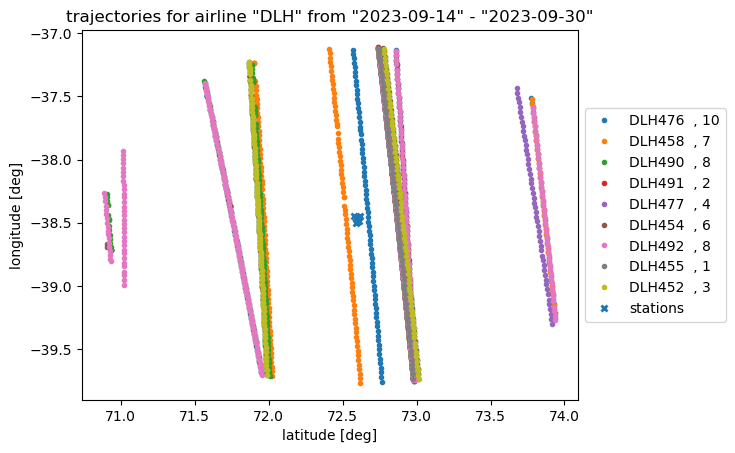

In [7]:
airline = 'DLH'
flights_one_airline = flights[flights.flightnumber.str.startswith(airline)]
flights_one_airline_distinct = flights_distinct[flights_distinct.flightnumber.str.startswith(airline)]

flightnumbers = sqldf(f'Select distinct flightnumber from flights_one_airline_distinct where min_r < {radius}')

for i in range(len(flightnumbers)):
    number_of_flights = sqldf(f'Select count(flightnumber) as counter from flights_one_airline_distinct Where flightnumber like "%{flightnumbers.flightnumber.iloc[i]}%" group By flightnumber')
    plt.plot(flights_one_airline[flights_one_airline.flightnumber == flightnumbers.flightnumber.iloc[i]].latitude, flights_one_airline[flights_one_airline.flightnumber == flightnumbers.flightnumber.iloc[i]].longitude, '.', label = f'{flightnumbers.flightnumber.iloc[i]}, {number_of_flights.counter.iloc[0]}')
plt.plot(tracker.stations.latitude, tracker.stations.longitude, 'x', label = 'stations', markersize = 5, markeredgewidth=2, c = 'C0')
plt.title(f'trajectories for airline "{airline}" from "{min(flights_one_airline.date)}" - "{max(flights_one_airline.date)}"')
plt.xlabel('latitude [deg]')
plt.ylabel('longitude [deg]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Number of flights per day (for 4 radii)

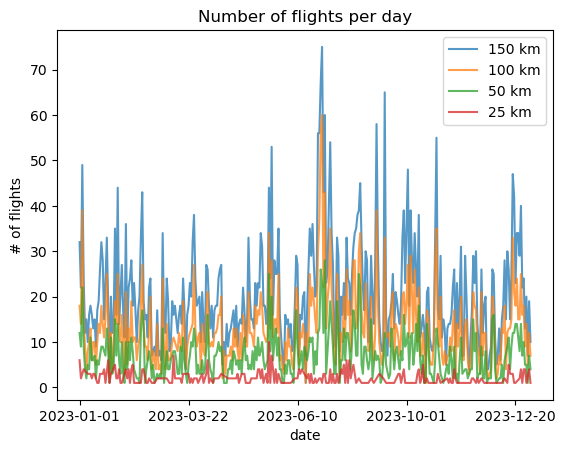

In [7]:
def query(min_r):

    return f'''
    Select 
        date, 
        count(flightnumber) as counter
    from flights_distinct
    Where min_r < {min_r}
    Group By date
    '''

import matplotlib.ticker as ticker
for i in [150, 100, 50, 25]:
    flights_per_day = sqldf(query(i))
    plt.plot(flights_per_day.date, flights_per_day.counter, label = f'{i} km', alpha = 0.75)
    plt.title('Number of flights per day')
plt.xlabel('date')
plt.ylabel('# of flights')
plt.legend()
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#plt.savefig('saved_figures/flights_per_day_2023.pdf')

# Analysis of trigger rates from header files


In [31]:
t = flights_distinct.reset_index(drop=True)
temp_df = pd.DataFrame()


for i in range(len(t)):
    print(f'---------------------')
    print(f'start: {i + 1}/{len(t)}, {t.flightnumber.iloc[i]}')
    f = tracker.get_flight_by_index(i, filetype='headers.root')
    flight = f.header_df.reset_index(drop=True)
    #flight['fk_station_run_event'] = flight.station_number.astype(str) + '_' + flight.run_number.astype(str) + '_' + flight.event_number.astype(str)
    #print(flight.head(50))

    if len(flight) > 0:
        temp_df = pd.concat([temp_df, flight], ignore_index=True, sort=False)
    
    print(f'end: {i + 1}/{len(t)}')
    clear_output(wait=True)

#print(len(temp_df))
#temp_df.drop_duplicates(subset=['fk_station_run_event'], inplace=True)
#print(len(temp_df))
#temp_df.head(50)

query = '''
    Select 
        flightnumber, 
        mintime, 
        maxtime, 
        min_r,
        min_z,
        theta
        --strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) as test_time, 
        count(*) as SumEvents, 
        round(count(*) / (JULIANDAY(t.maxtime) - JULIANDAY(t.mintime)) / 86400 * 10, 1) as EventsPer10Seconds,
        --sum(cw), 
        --sum(impulsive), 
        sum(lt_triggers), 
        sum(radiant_triggers), 
        sum(force_triggers) 
    From t
    Left Join temp_df
    On strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) >= t.mintime
    And strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) <= t.maxtime
    Group By flightnumber, maxtime, mintime
    order by mintime asc
    '''
t = sqldf(query)
clear_output(wait=True)
t


---------------------
start: 22/667, CLX46U  


In [34]:
query = '''
SELECT 
    airline
    ,round(Sum(SumEvents) / Sum(duration_in_min), 1) events_per_minute
    ,time
FROM (
    SELECT 
        *
        --,CASE WHEN (time >= '20:00:00') OR (time < '06:00:00') THEN 1 ELSE 0 END AS nighttime
        ,CASE WHEN (time < '20:00:00') OR (time >= '06:00:00') THEN 1 ELSE 0 END AS daytime
    FROM (
        SELECT 
            substr(flightnumber, 1, 3) as airline
            ,SumEvents
            ,round((JULIANDAY(t.maxtime) - JULIANDAY(t.mintime)) * 1440, 1) as duration_in_min
            ,time(t.mintime) as time
        FROM t
        Where substr(flightnumber, 1, 3) = 'UAL'
    )t0
)t1
WHERE daytime = 1
Group by airline
'''
result = sqldf(query)
result

,airline,events_per_minute,time
0,UAL,279.3,13:10:24


In [35]:
query = '''
SELECT 
    *
 FROM t
 Where  substr(flightnumber, 1, 3) = 'UAL'
 Order by mintime desc
'''

result = sqldf(query)
result.head(49)

,flightnumber,mintime,maxtime,SumEvents,EventsPer10Seconds,sum(lt_triggers),sum(radiant_triggers),sum(force_triggers)
0,UAL927,2023-09-30 20:10:32.300000,2023-09-30 20:11:37.600000,188,28.8,121.0,34.0,33.0
1,UAL969,2023-09-30 16:50:54.000000,2023-09-30 16:52:14.400000,229,28.5,150.0,39.0,40.0
2,UAL45,2023-09-30 16:32:38.700000,2023-09-30 16:33:44.000000,195,29.9,127.0,35.0,33.0
3,UAL927,2023-09-29 19:45:09.800000,2023-09-29 19:46:30.200000,228,28.4,150.0,38.0,40.0
4,UAL969,2023-09-29 16:50:49.000000,2023-09-29 16:52:09.400000,230,28.6,155.0,35.0,40.0
5,UAL939,2023-09-29 16:46:42.800000,2023-09-29 16:48:38.300000,388,33.6,253.0,78.0,57.0
6,UAL45,2023-09-29 16:18:19.500000,2023-09-29 16:19:19.800000,353,58.5,220.0,73.0,60.0
7,UAL59,2023-09-29 16:04:35.500000,2023-09-29 16:05:05.600000,78,25.9,53.0,10.0,15.0
8,UAL949,2023-09-29 14:56:55.800000,2023-09-29 14:58:01.100000,197,30.2,134.0,31.0,32.0
9,UAL195,2023-09-29 14:21:35.500000,2023-09-29 14:23:00.900000,241,28.2,176.0,23.0,42.0


In [13]:
        con = sqlite3.connect('./distinct_table_with_header_scores/2023-09-01')

        # Write the DataFrame to the SQLite database
        t.to_sql('flights_distinct_2023-09-01', con, if_exists = 'replace')
        temp_df.to_sql('header_df_2023-09-01', con, if_exists = 'replace')
        # Close the database connection
        con.close()

In [4]:
%tb header/trigger_info/trigger_info.radiant_trigger

SystemExit: No runs from "2023-01-01 01:07:57+00:00" to "2023-01-01 01:11:38+00:00"

# Analysis of events for '2023-05-12'

## Get event information

In [11]:
track = FlightTracker('2023-05-12 00:00:00') 

t = track.flights_distinct.reset_index(drop=True)
temp_df = pd.DataFrame()


for i in range(len(t)):
    print(f'---------------------')
    print(f'start: {i + 1}/{len(t)}, {t.flightnumber.iloc[i]}')
    f = track.get_flight_by_index(i)
    flight = f.header_df.reset_index(drop=True)
    flight['fk_station_run_event'] = flight.station_number.astype(str) + '_' + flight.run_number.astype(str) + '_' + flight.event_number.astype(str)
    #print(flight.head(50))

    if len(flight) > 0:
        temp_df = pd.concat([temp_df, flight], ignore_index=True, sort=False)
    
    print(f'end: {i + 1}/{len(t)}')
    clear_output(wait=True)

print(len(temp_df))
temp_df.drop_duplicates(subset=['fk_station_run_event'], inplace=True)
print(len(temp_df))
#temp_df.head(50)

query = '''
    Select 
        flightnumber, 
        mintime, 
        maxtime, 
        --strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) as test_time, 
        count(*) as SumEvents, 
        round(count(*) / (JULIANDAY(t.maxtime) - JULIANDAY(t.mintime)) / 86400 * 10, 1) as EventsPer10Seconds,
        sum(cw), 
        sum(impulsive), 
        sum(lt_triggers), 
        sum(radiant_triggers), 
        sum(force_triggers) 
    From t
    Left Join temp_df
    On strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) >= t.mintime
    And strftime('%Y-%m-%d %H:%M:%S.%f', datetime(temp_df.trigger_time, 'unixepoch')) <= t.maxtime
    Group By flightnumber, maxtime, mintime
    order by mintime asc
    '''
t = sqldf(query)
clear_output(wait=True)
t


,flightnumber,mintime,maxtime,SumEvents,EventsPer10Seconds,sum(cw),sum(impulsive),sum(lt_triggers),sum(radiant_triggers),sum(force_triggers)
0,MMD6260,2023-05-12 00:59:33.000000,2023-05-12 01:03:19.100000,46,2.0,0,3,32,4,10
1,THY8JK,2023-05-12 07:05:09.600000,2023-05-12 07:11:06.400000,106,3.0,0,0,70,19,17
2,THY76Y,2023-05-12 07:24:30.300000,2023-05-12 07:25:30.600000,10,1.7,0,0,6,3,1
3,THY8MT,2023-05-12 11:12:41.800000,2023-05-12 11:18:43.600000,140,3.9,39,10,88,26,26
4,THY73G,2023-05-12 11:19:18.800000,2023-05-12 11:25:15.500000,96,2.7,43,13,53,23,20
5,SAS931,2023-05-12 11:19:43.900000,2023-05-12 11:25:15.500000,90,2.7,39,12,49,22,19
6,DAL143,2023-05-12 11:57:24.900000,2023-05-12 11:58:25.200000,14,2.3,0,0,10,0,4
7,OCN72,2023-05-12 12:40:07.300000,2023-05-12 12:46:14.100000,117,3.2,16,14,81,23,13
8,DLH456,2023-05-12 13:06:20.000000,2023-05-12 13:11:56.600000,107,3.2,0,12,71,20,16
9,DAL179,2023-05-12 13:17:18.200000,2023-05-12 13:23:25.000000,134,3.7,17,13,98,22,14


## Join events on flights

In [12]:
query = '''
SELECT 
    *
    ,round(sum(SumEvents) / [sum(duration_in_min)], 1) as events_per_minute
    ,round([sum(cw)] / [sum(duration_in_min)], 1) as cw_per_minute
    ,round([sum(impulsive)] / [sum(duration_in_min)], 1) as impulsive_per_minute
    
FROM (
    SELECT 
        airline
        ,count(airline)
        ,sum([sum(cw)]) as [sum(cw)]
        ,sum([sum(impulsive)]) as [sum(impulsive)]
        ,sum(SumEvents) as SumEvents
        ,sum(duration_in_min) as [sum(duration_in_min)]
    FROM (
        SELECT 
            substr(flightnumber, 1, 3) as airline
            ,[sum(cw)]
            ,[sum(impulsive)]
            ,SumEvents
            ,round((JULIANDAY(t.maxtime) - JULIANDAY(t.mintime)) * 86400 / 60, 1) as duration_in_min
        FROM t
        --WHERE min_r < 50
    )t0
    GROUP BY airline 
)t1
    GROUP BY airline
    ORDER BY round([sum(impulsive)] / [sum(duration_in_min)], 1) desc
'''

result = sqldf(query)
result.head(49)

,airline,count(airline),sum(cw),sum(impulsive),SumEvents,sum(duration_in_min),events_per_minute,cw_per_minute,impulsive_per_minute
0,CFG,1,4,32,122,6.1,20.0,0.7,5.2
1,N/A,1,0,1,9,0.3,30.0,0.0,3.3
2,PIA,1,0,19,104,6.3,16.5,0.0,3.0
3,SAS,2,39,34,196,11.6,16.9,3.4,2.9
4,THY,6,82,71,567,30.7,18.5,2.7,2.3
5,OCN,1,16,14,117,6.1,19.2,2.6,2.3
6,DLH,3,6,40,349,17.8,19.6,0.3,2.2
7,SKI,1,620,163,2067,93.6,22.1,6.6,1.7
8,DAL,3,87,23,331,14.3,23.1,6.1,1.6
9,UAL,1,2,5,54,3.7,14.6,0.5,1.4


## Plot flights

In [13]:
track.flights_distinct

,index,flightnumber,date,filename,mintime,maxtime,min_r,min_z,theta
0,0,THY8JK,2023-05-12,2023.05.13-051443.db,2023-05-12 07:05:09.600000,2023-05-12 07:11:06.400000,24.8,9.5,86.0
1,1,THY76Y,2023-05-12,2023.05.13-051443.db,2023-05-12 07:24:30.300000,2023-05-12 07:25:30.600000,148.1,9.5,85.0
2,2,THY8MT,2023-05-12,2023.05.13-051443.db,2023-05-12 11:12:41.800000,2023-05-12 11:18:43.600000,27.6,8.6,86.0
3,3,THY73G,2023-05-12,2023.05.13-051443.db,2023-05-12 11:19:18.800000,2023-05-12 11:25:15.500000,27.7,10.2,86.0
4,4,SAS931,2023-05-12,2023.05.13-051443.db,2023-05-12 11:19:43.900000,2023-05-12 11:25:15.500000,56.4,9.9,87.0
5,5,DAL143,2023-05-12,2023.05.13-051443.db,2023-05-12 11:57:24.900000,2023-05-12 11:58:25.200000,148.0,9.5,85.0
6,6,OCN72,2023-05-12,2023.05.13-051443.db,2023-05-12 12:40:07.300000,2023-05-12 12:46:14.100000,27.4,9.2,86.0
7,7,DLH456,2023-05-12,2023.05.13-051443.db,2023-05-12 13:06:20.000000,2023-05-12 13:11:56.600000,57.6,8.9,87.0
8,8,DAL179,2023-05-12,2023.05.13-051443.db,2023-05-12 13:17:18.200000,2023-05-12 13:23:25.000000,72.8,9.5,82.0
9,9,DLH490,2023-05-12,2023.05.13-051443.db,2023-05-12 13:37:34.100000,2023-05-12 13:43:50.900000,27.6,9.8,86.0


/home/oliver/software/Flights/Flight.py:220: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  header_df = pd.concat([header_df, temp_df], ignore_index=True, sort=False)


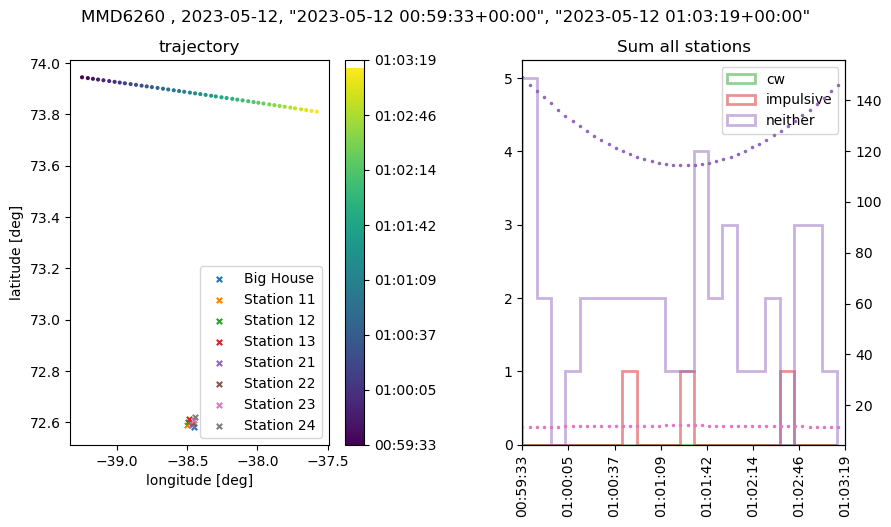

In [14]:
flight = track.get_flight_by_index(21)
flight.plot_flight()